In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as  plt
import seaborn as sns

import random
from random import sample

pd.set_option('display.max_columns', 1000)
from scipy.interpolate import interp1d
from scipy import interpolate as inter
import scipy.stats
from pandas.plotting import table 
import dataframe_image as dfi

from PIL import Image
pd.set_option('mode.chained_assignment',None)

In [2]:
metabolic = pd.read_csv('metabolic_corr.csv',index_col=0)

In [3]:
display(metabolic.head(20))
display(metabolic.tail(20))


TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   
TAdipose - Visceral (Omentum)M025G001                         0.134702   
TArtery - AortaM020G001                                       0.125879   
TArtery - AortaM029G001                                      -0.189432   
TArtery - AortaM031G001                                      -0.121794   
TArtery - TibialM026G001                                      0.113968   
TArtery - TibialM029G001                                      0.026996   
TArtery - TibialM035G001                                      0.186529   
TBreast - Mammary TissueM016G001                              0.158429   
TBreast - Mammary TissueM017G001                              0.222070   
TCells - Cultured fibroblastsM002G001                         0.027928   
TEsophagus - MucosaM022G001                                  -0.074932   
TEsophagus - MuscularisM019G001                               0.206707   
TEsophagus - MuscularisM035G001                              -0.113269   
THeart - Atrial AppendageM003G001                            -0.034198   
THeart - Atrial AppendageM025G001                             0.049718   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   
TAdipose - Visceral (Omentum)M025G001                        -0.039940   
TArtery - AortaM020G001                                       0.145727   
TArtery - AortaM029G001                                      -0.055024   
TArtery - AortaM031G001                                      -0.101602   
TArtery - TibialM026G001                                      0.254089   
TArtery - TibialM029G001                                     -0.419236   
TArtery - TibialM035G001                                     -0.234707   
TBreast - Mammary TissueM016G001                             -0.020976   
TBreast - Mammary TissueM017G001                             -0.068390   
TCells - Cultured fibroblastsM002G001                        -0.135748   
TEsophagus - MucosaM022G001                                   0.040805   
TEsophagus - MuscularisM019G001                               0.114444   
TEsophagus - MuscularisM035G001                              -0.126502   
THeart - Atrial AppendageM003G001                             0.118740   
THeart - Atrial AppendageM025G001                             0.077329   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   
TAdipose - Visceral (Omentum)M025G001                        -0.094004   
TArtery - AortaM020G001                                      -0.275146   
TArtery - AortaM029G001                                      -0.079593   
TArtery - AortaM031G001                                      -0.141973   
TArtery - TibialM026G001                                      0.396750   
TArtery - TibialM029G001                                     -0.412570   
TArtery - TibialM035G001                 

TAdipose - SubcutaneousM003G001  \
THeart - Left VentricleM003G001                                     -0.032000   
TLiverM010G001                                                      -0.084974   
TLiverM036G001                                                      -0.136013   
TLiverM038G001                                                      -0.125759   
TLungM001G001                                                       -0.100938   
TLungM004G001                                                       -0.072336   
TLungM015G001                                                       -0.109424   
TLungM025G001                                                        0.171658   
TMuscle - SkeletalM007G001                                           0.156986   
TNerve - TibialM012G001                                             -0.019363   
TNerve - TibialM017G001                                             -0.150561   
TSkin - Not Sun Exposed (Suprapubic)M006G001                         0.130140   
TSkin - Not Sun Exposed (Suprapubic)M013G001                        -0.049229   
TSkin - Sun Exposed (Lower leg)M024G001                             -0.008718   
TSkin - Sun Exposed (Lower leg)M036G001                              0.083376   
TTestisM002G001                                                      0.008517   
TThyroidM018G001                                                     0.017593   
TThyroidM032G001                                                    -0.005457   
TWhole BloodM002G001                                                -0.069071   
TWhole BloodM007G001                                                -0.112304   

                                              TAdipose - SubcutaneousM032G001  \
THeart - Left VentricleM003G001                                     -0.127054   
TLiverM010G001                                                      -0.083299   
TLiverM036G001                                                      -0.100977   
TLiverM038G001                                                       0.019475   
TLungM001G001                                                       -0.192514   
TLungM004G001                                                       -0.018581   
TLungM015G001                                                        0.141619   
TLungM025G001                                                        0.048976   
TMuscle - SkeletalM007G001                                          -0.168553   
TNerve - TibialM012G001                                              0.016797   
TNerve - TibialM017G001                                             -0.116788   
TSkin - Not Sun Exposed (Suprapubic)M006G001                        -0.158013   
TSkin - Not Sun Exposed (Suprapubic)M013G001                         0.058744   
TSkin - Sun Exposed (Lower leg)M024G001                              0.079590   
TSkin - Sun Exposed (Lower leg)M036G001                             -0.045184   
TTestisM002G001                                                     -0.094100   
TThyroidM018G001                                                     0.021687   
TThyroidM032G001                                                    -0.107820   
TWhole BloodM002G001                                                -0.033059   
TWhole BloodM007G001                                                 0.130825   

                                              TAdipose - SubcutaneousM038G001  \
THeart - Left VentricleM003G001                                     -0.127083   
TLiverM010G001                                                      -0.230754   
TLiverM036G001                                                      -0.372227   
TLiverM038G001                                                      -0.502258   
TLungM001G001                                                        0.009424   
TLungM004G001                                                        0.092035   
TLungM015G001                                                        0.0032

In [4]:
metabolic = metabolic.dropna(axis=0,how='all')
metabolic = metabolic.dropna(axis=1,how='all')
#metabolic = metabolic.dropna(axis=0,how='any')
#metabolic = metabolic.dropna(axis=1,how='any')


In [5]:
display(metabolic.head(20))
display(metabolic.tail(20))


TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   
TAdipose - Visceral (Omentum)M025G001                         0.134702   
TArtery - AortaM020G001                                       0.125879   
TArtery - AortaM029G001                                      -0.189432   
TArtery - AortaM031G001                                      -0.121794   
TArtery - TibialM026G001                                      0.113968   
TArtery - TibialM029G001                                      0.026996   
TArtery - TibialM035G001                                      0.186529   
TBreast - Mammary TissueM016G001                              0.158429   
TBreast - Mammary TissueM017G001                              0.222070   
TCells - Cultured fibroblastsM002G001                         0.027928   
TEsophagus - MucosaM022G001                                  -0.074932   
TEsophagus - MuscularisM019G001                               0.206707   
TEsophagus - MuscularisM035G001                              -0.113269   
THeart - Atrial AppendageM003G001                            -0.034198   
THeart - Atrial AppendageM025G001                             0.049718   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   
TAdipose - Visceral (Omentum)M025G001                        -0.039940   
TArtery - AortaM020G001                                       0.145727   
TArtery - AortaM029G001                                      -0.055024   
TArtery - AortaM031G001                                      -0.101602   
TArtery - TibialM026G001                                      0.254089   
TArtery - TibialM029G001                                     -0.419236   
TArtery - TibialM035G001                                     -0.234707   
TBreast - Mammary TissueM016G001                             -0.020976   
TBreast - Mammary TissueM017G001                             -0.068390   
TCells - Cultured fibroblastsM002G001                        -0.135748   
TEsophagus - MucosaM022G001                                   0.040805   
TEsophagus - MuscularisM019G001                               0.114444   
TEsophagus - MuscularisM035G001                              -0.126502   
THeart - Atrial AppendageM003G001                             0.118740   
THeart - Atrial AppendageM025G001                             0.077329   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   
TAdipose - Visceral (Omentum)M025G001                        -0.094004   
TArtery - AortaM020G001                                      -0.275146   
TArtery - AortaM029G001                                      -0.079593   
TArtery - AortaM031G001                                      -0.141973   
TArtery - TibialM026G001                                      0.396750   
TArtery - TibialM029G001                                     -0.412570   
TArtery - TibialM035G001                 

TAdipose - SubcutaneousM003G001  \
THeart - Left VentricleM003G001                                     -0.032000   
TLiverM010G001                                                      -0.084974   
TLiverM036G001                                                      -0.136013   
TLiverM038G001                                                      -0.125759   
TLungM001G001                                                       -0.100938   
TLungM004G001                                                       -0.072336   
TLungM015G001                                                       -0.109424   
TLungM025G001                                                        0.171658   
TMuscle - SkeletalM007G001                                           0.156986   
TNerve - TibialM012G001                                             -0.019363   
TNerve - TibialM017G001                                             -0.150561   
TSkin - Not Sun Exposed (Suprapubic)M006G001                         0.130140   
TSkin - Not Sun Exposed (Suprapubic)M013G001                        -0.049229   
TSkin - Sun Exposed (Lower leg)M024G001                             -0.008718   
TSkin - Sun Exposed (Lower leg)M036G001                              0.083376   
TTestisM002G001                                                      0.008517   
TThyroidM018G001                                                     0.017593   
TThyroidM032G001                                                    -0.005457   
TWhole BloodM002G001                                                -0.069071   
TWhole BloodM007G001                                                -0.112304   

                                              TAdipose - SubcutaneousM032G001  \
THeart - Left VentricleM003G001                                     -0.127054   
TLiverM010G001                                                      -0.083299   
TLiverM036G001                                                      -0.100977   
TLiverM038G001                                                       0.019475   
TLungM001G001                                                       -0.192514   
TLungM004G001                                                       -0.018581   
TLungM015G001                                                        0.141619   
TLungM025G001                                                        0.048976   
TMuscle - SkeletalM007G001                                          -0.168553   
TNerve - TibialM012G001                                              0.016797   
TNerve - TibialM017G001                                             -0.116788   
TSkin - Not Sun Exposed (Suprapubic)M006G001                        -0.158013   
TSkin - Not Sun Exposed (Suprapubic)M013G001                         0.058744   
TSkin - Sun Exposed (Lower leg)M024G001                              0.079590   
TSkin - Sun Exposed (Lower leg)M036G001                             -0.045184   
TTestisM002G001                                                     -0.094100   
TThyroidM018G001                                                     0.021687   
TThyroidM032G001                                                    -0.107820   
TWhole BloodM002G001                                                -0.033059   
TWhole BloodM007G001                                                 0.130825   

                                              TAdipose - SubcutaneousM038G001  \
THeart - Left VentricleM003G001                                     -0.127083   
TLiverM010G001                                                      -0.230754   
TLiverM036G001                                                      -0.372227   
TLiverM038G001                                                      -0.502258   
TLungM001G001                                                        0.009424   
TLungM004G001                                                        0.092035   
TLungM015G001                                                        0.0032

In [6]:
print(metabolic.shape)
met_shape = metabolic.shape[0]

(40, 40)


In [7]:
corr_thresholds = list(range(200, 655, 5))
myInt = 1000
corr_thresholds[:] = [x / myInt for x in corr_thresholds]
print(corr_thresholds)
print(len(corr_thresholds))

pos_cases = [0]*91
neg_cases = [0]*91
ratio_pos_neg = [0]*91



[0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65]
91


In [8]:
corrlist = []
metabolic_indexes = metabolic.index.tolist()
metabolic_columns = metabolic.columns.tolist()

for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        if meti !=metj:
            corrlist.append(metabolic.iloc[i,j])
        
inter_met_corr = len(corrlist)
print(inter_met_corr)



751


In [9]:
d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'ratio pos neg' : ratio_pos_neg}
     
df_metabolic = pd.DataFrame(d)


for i in range(df_metabolic.shape[0]):
    count_pos = 0
    count_neg = 0
    for j in range(len(corrlist)):
        if corrlist[j] >= df_metabolic['corr thresholds'].iloc[i]:
            count_pos +=1
    for j in range(len(corrlist)):
        if corrlist[j] <= -df_metabolic['corr thresholds'].iloc[i]:
            count_neg +=1
    df_metabolic['pos cases'].iloc[i] = count_pos
    df_metabolic['neg cases'].iloc[i] = count_neg
    df_metabolic['ratio pos neg'].iloc[i] = count_pos / max(count_neg,1)
    
display(df_metabolic.head(33))   
                   
        

corr thresholds  pos cases  neg cases  ratio pos neg
0             0.200         77         49       1.571429
1             0.205         73         46       1.586957
2             0.210         71         41       1.731707
3             0.215         67         38       1.763158
4             0.220         63         34       1.852941
5             0.225         61         33       1.848485
6             0.230         58         32       1.812500
7             0.235         57         25       2.280000
8             0.240         54         23       2.347826
9             0.245         54         23       2.347826
10            0.250         51         23       2.217391
11            0.255         47         22       2.136364
12            0.260         47         22       2.136364
13            0.265         42         21       2.000000
14            0.270         37         19       1.947368
15            0.275         32         18       1.777778
16            0.280         30         16       1.875000
17            0.285         29         14       2.071429
18            0.290         27         14       1.928571
19            0.295         26         14       1.857143
20            0.300         26         13       2.000000
21            0.305         26         11       2.363636
22            0.310         23         10       2.300000
23            0.315         22         10       2.200000
24            0.320         21          9       2.333333
25            0.325         20          8       2.500000
26            0.330         19          8       2.375000
27            0.335         18          7       2.571429
28            0.340         17          7       2.428571
29            0.345         16          7       2.285714
30            0.350         16          7       2.285714
31            0.355         15          7       2.142857
32            0.360         15          7       2.142857

In [10]:
display(df_metabolic.tail(33))  

corr thresholds  pos cases  neg cases  ratio pos neg
58            0.490          2          1            2.0
59            0.495          1          1            1.0
60            0.500          1          1            1.0
61            0.505          1          0            1.0
62            0.510          1          0            1.0
63            0.515          1          0            1.0
64            0.520          1          0            1.0
65            0.525          1          0            1.0
66            0.530          1          0            1.0
67            0.535          1          0            1.0
68            0.540          1          0            1.0
69            0.545          1          0            1.0
70            0.550          1          0            1.0
71            0.555          1          0            1.0
72            0.560          1          0            1.0
73            0.565          1          0            1.0
74            0.570          1          0            1.0
75            0.575          1          0            1.0
76            0.580          1          0            1.0
77            0.585          1          0            1.0
78            0.590          1          0            1.0
79            0.595          1          0            1.0
80            0.600          1          0            1.0
81            0.605          1          0            1.0
82            0.610          1          0            1.0
83            0.615          1          0            1.0
84            0.620          1          0            1.0
85            0.625          1          0            1.0
86            0.630          1          0            1.0
87            0.635          1          0            1.0
88            0.640          0          0            0.0
89            0.645          0          0            0.0
90            0.650          0          0            0.0

In [11]:
tissue_key = pd.read_csv('IncludedTissuesSelect.csv',index_col=0)
display(tissue_key.head(19))

tissue_key_index_list = tissue_key.index.tolist()
data_frames = []
for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    print(current)
 

Quantity
Tissue Type                                  
Adipose - Subcutaneous                      3
Adipose - Visceral (Omentum)                3
Artery - Aorta                              3
Artery - Tibial                             3
Breast - Mammary Tissue                     2
Cells - Cultured fibroblasts                1
Esophagus - Mucosa                          1
Esophagus - Muscularis                      2
Heart - Atrial Appendage                    2
Heart - Left Ventricle                      1
Liver                                       3
Lung                                        4
Muscle - Skeletal                           1
Nerve - Tibial                              2
Skin - Not Sun Exposed (Suprapubic)         2
Skin - Sun Exposed (Lower leg)              2
Testis                                      1
Thyroid                                     2
Whole Blood                                 2

TAdipose - Subcutaneous_df.csv
TAdipose - Visceral (Omentum)_df.csv
TArtery - Aorta_df.csv
TArtery - Tibial_df.csv
TBreast - Mammary Tissue_df.csv
TCells - Cultured fibroblasts_df.csv
TEsophagus - Mucosa_df.csv
TEsophagus - Muscularis_df.csv
THeart - Atrial Appendage_df.csv
THeart - Left Ventricle_df.csv
TLiver_df.csv
TLung_df.csv
TMuscle - Skeletal_df.csv
TNerve - Tibial_df.csv
TSkin - Not Sun Exposed (Suprapubic)_df.csv
TSkin - Sun Exposed (Lower leg)_df.csv
TTestis_df.csv
TThyroid_df.csv
TWhole Blood_df.csv


In [12]:
tissue_key_index_list = tissue_key.index.tolist()
data_frames = []


for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    data_frames.append(current)

tissue_key['DataFrames'] = data_frames
display(tissue_key.head())

Quantity                            DataFrames
Tissue Type                                                                 
Adipose - Subcutaneous               3        TAdipose - Subcutaneous_df.csv
Adipose - Visceral (Omentum)         3  TAdipose - Visceral (Omentum)_df.csv
Artery - Aorta                       3                TArtery - Aorta_df.csv
Artery - Tibial                      3               TArtery - Tibial_df.csv
Breast - Mammary Tissue              2       TBreast - Mammary Tissue_df.csv

In [13]:
def select_subset(seedbasis):
    modules = []
    for i in range(tissue_key.shape[0]):
        current_seed = seedbasis+i
        sample_size = tissue_key['Quantity'].iloc[i]
        current_df = tissue_key['DataFrames'].iloc[i]
        df = pd.read_csv(current_df,index_col=0)
        df = df.sample(random_state=current_seed, n=sample_size, axis=1)
        df_columns = df.columns.tolist()
        for j in range(len(df_columns)):
            modules.append(df_columns[j])
        #print(modules)
        #print(len(modules))
    return(modules)

a = select_subset(2000)
print(a)

['TAdipose - SubcutaneousM006G002', 'TAdipose - SubcutaneousM018G006', 'TAdipose - SubcutaneousM012G099', 'TAdipose - Visceral (Omentum)M022G005', 'TAdipose - Visceral (Omentum)M009G006', 'TAdipose - Visceral (Omentum)M023G005', 'TArtery - AortaM022G099', 'TArtery - AortaM036G099', 'TArtery - AortaM049G099', 'TArtery - TibialM023G002', 'TArtery - TibialM028G099', 'TArtery - TibialM020G099', 'TBreast - Mammary TissueM001G002', 'TBreast - Mammary TissueM014G005', 'TCells - Cultured fibroblastsM003G006', 'TEsophagus - MucosaM021G006', 'TEsophagus - MuscularisM027G005', 'TEsophagus - MuscularisM008G002', 'THeart - Atrial AppendageM016G003', 'THeart - Atrial AppendageM021G003', 'THeart - Left VentricleM015G002', 'TLiverM034G099', 'TLiverM037G006', 'TLiverM006G006', 'TLungM003G004', 'TLungM020G006', 'TLungM017G006', 'TLungM002G099', 'TMuscle - SkeletalM014G006', 'TNerve - TibialM049G099', 'TNerve - TibialM046G099', 'TSkin - Not Sun Exposed (Suprapubic)M010G006', 'TSkin - Not Sun Exposed (Sup

In [14]:
iterationk = 1000
tissue = 1

In [15]:
all_corrs = pd.read_csv('big_corr.csv',index_col=0)
print(all_corrs.shape)


(609, 609)


In [16]:
all_corrs_values = []

big_indexes = all_corrs.index.tolist()
big_columns = all_corrs.columns.tolist()

counter = 0

for i in range(all_corrs.shape[0]):
    for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        if alli !=allj:
            all_corrs_values.append(all_corrs.iloc[i,j])
            
print(len(all_corrs_values))


174012


In [17]:
def make_smaller_df(df_all, random_state_seed):
    #print('hi')
    #print(type(df_all))
    #print(df_all.shape)
    #print(size_of_subset)
    
    df_all_index = df_all.index.tolist()
    #print(df_all_index)
    #print(len(df_all_index))
    sub_corrs = select_subset(random_state_seed)
    #print(sub_corrs)
    #print(len(sub_corrs))
    new_df = df_all[sub_corrs]
    new_df = new_df.loc[sub_corrs]
    
    corrs = []
    new_df_index = new_df.index.tolist()
    new_df_columns = new_df.columns.tolist()
    for i in range(new_df.shape[0]):
        for j in range(i+1,new_df.shape[1]):
            newi = new_df_index[i]
            newj = new_df_columns[j]
            newi = newi[1:-8]
            newj = newj[1:-8]
            if newi != newj:
                corrs.append(new_df.iloc[i,j])
    #print(len(corrs))        
    
    '''
    
    metabolic_indexes = metabolic.index.tolist()
    metabolic_columns = metabolic.columns.tolist()
    for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        if meti !=metj:
            corrlist.append(metabolic.iloc[i,j])
        
    inter_met_corr = len(corrlist)
    print(inter_met_corr)

    '''
    
    
    '''
    print('in make smaller')
    print(type(all_list))
    print(size_of_subset)
    
    print('sub_corrs')
    print(sub_corrs)
    print(len(sub_corrs))
    
    
    #print(sample(list1,3))

    return sub_corrs
    '''
    return corrs
#ex1 = make_smaller_df(all_corrs_values,inter_met_corr)
#print(ex1)
#print(len(ex1))
      
#ex2 = make_smaller_df(all_corrs_values,inter_met_corr)
#print(ex2)
#print(len(ex2))



    


In [20]:
def one_iteration_subsample(df,random_state_seed):
    
    
    #df2 = make_smaller_df(df)
    #print('one iterationa subsample')
    #print(type(df))
    #print(df.shape)
    
    
    corr2list = make_smaller_df(df,random_state_seed)
   
    
    #for i in range(df2.shape[0]):
    #    for j in range(i+1,df2.shape[1]):
    #        corr2list.append(df2.iloc[i,j])
            
    
    corr_thresholds = list(range(200, 655, 5))
    myInt = 1000
    corr_thresholds[:] = [x / myInt for x in corr_thresholds]
    #print(corr_thresholds)
    #print(len(corr_thresholds))
    

    pos_cases = [0]*91
    neg_cases = [0]*91
    ratio_pos_neg = [0]*91
    
    d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'ratio pos neg' : ratio_pos_neg}
     
    df_corr_stats = pd.DataFrame(d)
   


    for i in range(df_corr_stats.shape[0]):
        count_pos = 0
        count_neg = 0
        for j in range(len(corr2list)):
            if corr2list[j] >= df_metabolic['corr thresholds'].iloc[i]:
                count_pos +=1
        for j in range(len(corr2list)):
            if corr2list[j] <= -df_metabolic['corr thresholds'].iloc[i]:
                count_neg +=1
        df_corr_stats['pos cases'].iloc[i] = count_pos
        df_corr_stats['neg cases'].iloc[i] = count_neg
        df_corr_stats['ratio pos neg'].iloc[i] = count_pos / max(1,count_neg)
    
    return df_corr_stats





In [21]:
corr_big_list = []
pos_big_list = []
neg_big_list = []
ratio_big_list = []



for k in range(1000):
    if (k % 100 == 0):
        print (k)
    #print(all_corrs.shape)
    k_times_1000 = k*1000
    df_stats = one_iteration_subsample(all_corrs,k_times_1000)
    threshold = df_stats['corr thresholds'].tolist()
    positives = df_stats['pos cases'].tolist()
    negatives = df_stats['neg cases'].tolist()
    ratios = df_stats['ratio pos neg'].tolist()
    corr_big_list = corr_big_list+threshold
    pos_big_list = pos_big_list+positives
    neg_big_list = neg_big_list+negatives
    ratio_big_list = ratio_big_list + ratios

print(len(corr_big_list))
    
    
   

0
100
200
300
400
500
600
700
800
900
91000


In [ ]:
d = {'corr thresholds' : corr_big_list, 
     'pos cases' : pos_big_list,
     'neg cases' : neg_big_list,
     'ratios': ratio_big_list
     }
     
df_corr_stats = pd.DataFrame(d)
print(df_corr_stats.shape)
display(df_corr_stats.head(3))
display(df_corr_stats.tail(4))


(91000, 4)


corr thresholds  pos cases  neg cases    ratios
0            0.200         82         79  1.037975
1            0.205         75         76  0.986842
2            0.210         75         73  1.027397

corr thresholds  pos cases  neg cases  ratios
90996            0.635          1          0     1.0
90997            0.640          1          0     1.0
90998            0.645          1          0     1.0
90999            0.650          1          0     1.0

In [ ]:
quantile95 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)

In [ ]:
quantile05 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.05)

In [ ]:
display(quantile05.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.200                43.00      41.00  0.777705
0.205                40.00      38.00  0.772141
0.210                38.00      35.00  0.767368
0.215                34.00      32.00  0.753835
0.220                33.00      29.00  0.749773
0.225                30.00      27.00  0.739905
0.230                28.00      25.95  0.741347
0.235                26.00      23.00  0.729072
0.240                24.00      22.00  0.722222
0.245                22.00      20.00  0.711039
0.250                20.95      19.00  0.698091
0.255                19.00      17.00  0.690435
0.260                18.00      15.00  0.682780
0.265                16.00      14.00  0.692308
0.270                15.00      13.00  0.666667
0.275                13.00      12.00  0.666667
0.280                12.00      11.00  0.642857
0.285                11.00      10.00  0.631481
0.290                10.00       9.00  0.636364
0.295                 9.00       8.00  0.638889
0.300                 8.95       7.00  0.625000
0.305                 8.00       7.00  0.618452
0.310                 7.00       6.00  0.600000
0.315                 6.00       6.00  0.600000
0.320                 6.00       5.00  0.583333
0.325                 5.00       4.00  0.555556
0.330                 5.00       4.00  0.549773
0.335                 4.95       3.00  0.555556
0.340                 4.00       3.00  0.545105
0.345                 4.00       3.00  0.500000
0.350                 3.00       2.00  0.500000
0.355                 3.00       2.00  0.500000
0.360                 3.00       2.00  0.500000
0.365                 2.00       1.00  0.454545

In [ ]:
display(quantile95.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.200                 84.0      84.00  1.392951
0.205                 80.0      79.00  1.391507
0.210                 77.0      75.00  1.403526
0.215                 73.0      72.00  1.423135
0.220                 69.0      68.00  1.458494
0.225                 66.0      66.00  1.449111
0.230                 63.0      62.00  1.484892
0.235                 60.0      60.00  1.515200
0.240                 58.0      57.00  1.542083
0.245                 55.0      55.00  1.533810
0.250                 52.0      52.00  1.577387
0.255                 49.0      49.00  1.600556
0.260                 47.0      46.00  1.606313
0.265                 46.0      45.00  1.652899
0.270                 43.0      42.00  1.739674
0.275                 41.0      40.00  1.764932
0.280                 39.0      38.00  1.814983
0.285                 37.0      36.00  1.875694
0.290                 35.0      35.00  1.933333
0.295                 33.0      33.00  1.934394
0.300                 32.0      31.00  2.000000
0.305                 30.0      29.00  2.154049
0.310                 29.0      28.00  2.143407
0.315                 27.0      27.00  2.166667
0.320                 27.0      26.00  2.250000
0.325                 25.0      24.00  2.400000
0.330                 24.0      23.00  2.500000
0.335                 23.0      21.05  2.750000
0.340                 21.0      20.00  2.750000
0.345                 20.0      19.00  3.000000
0.350                 20.0      18.00  3.000000
0.355                 19.0      17.00  3.500000
0.360                 18.0      16.00  4.000000
0.365                 17.0      15.00  4.000000

In [ ]:
df_all_corr_averages = df_corr_stats.groupby('corr thresholds').mean()

df_all_corr_std = df_corr_stats.groupby('corr thresholds').std()

df_all_corr_std.rename(columns = {'pos cases':'pos std', 
                                  'neg cases':'neg std',
                                  'ratios' : 'ratio std'}, inplace = True)

df_all = pd.concat([df_all_corr_averages, df_all_corr_std], join="inner",axis=1)


        
        


df_all['pos lower'] = df_all['pos cases'] - df_all['pos std']
df_all['pos higher'] = df_all['pos cases'] + df_all['pos std']
df_all['neg lower'] = df_all['neg cases'] - df_all['neg std']
df_all['neg higher'] = df_all['neg cases'] + df_all['neg std']

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] < 0.1:
        df_all['neg cases'].iloc[i] = 20

df_all['ratios'] = df_all['pos cases'] / df_all['neg cases']

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] == 20:
        df_all['neg cases'].iloc[i] = 0.05


display(df_all)

pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.200               61.811     60.405  1.023276  12.679987  13.050030   
0.205               57.939     57.191  1.013079  12.349404  12.780762   
0.210               55.012     53.853  1.021522  12.072266  12.567949   
0.215               51.548     50.615  1.018433  11.862901  12.315699   
0.220               48.976     47.595  1.029016  11.592403  11.999790   
...                    ...        ...       ...        ...        ...   
0.630                0.055      0.050  0.002750   0.240900   0.206016   
0.635                0.049      0.050  0.002450   0.225055   0.165055   
0.640                0.039      0.050  0.001950   0.198793   0.165055   
0.645                0.037      0.050  0.001850   0.188856   0.165055   
0.650                0.033      0.050  0.001650   0.178726   0.153126   

                 ratio std  pos lower  pos higher  neg lower  neg higher  
corr thresholds                                                           
0.200             0.209320  49.131013   74.490987  47.354970   73.455030  
0.205             0.213477  45.589596   70.288404  44.410238   69.971762  
0.210             0.225244  42.939734   67.084266  41.285051   66.420949  
0.215             0.234009  39.685099   63.410901  38.299301   62.930699  
0.220             0.241092  37.383597   60.568403  35.595210   59.594790  
...                    ...        ...         ...        ...         ...  
0.630             0.239452  -0.185900    0.295900  -0.166016    0.246016  
0.635             0.225055  -0.176055    0.274055  -0.137055    0.193055  
0.640             0.198793  -0.159793    0.237793  -0.137055    0.193055  
0.645             0.188856  -0.151856    0.225856  -0.137055    0.193055  
0.650             0.178726  -0.145726    0.211726  -0.129126    0.177126  

[91 rows x 10 columns]

In [ ]:
df_all['ratios'] =  df_all['ratios'].replace(np.inf, 20)
df_all['ratios'] =  df_all['ratios'].replace(np.nan, 20)
df_all['ratios'] =  df_all['ratios']
df_all['ratios std plus'] = df_all['ratios']+ df_all['ratio std']
df_all['ratios std minus'] = df_all['ratios'] - df_all['ratio std']

display(df_all)


pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.200               61.811     60.405  1.023276  12.679987  13.050030   
0.205               57.939     57.191  1.013079  12.349404  12.780762   
0.210               55.012     53.853  1.021522  12.072266  12.567949   
0.215               51.548     50.615  1.018433  11.862901  12.315699   
0.220               48.976     47.595  1.029016  11.592403  11.999790   
...                    ...        ...       ...        ...        ...   
0.630                0.055      0.050  0.002750   0.240900   0.206016   
0.635                0.049      0.050  0.002450   0.225055   0.165055   
0.640                0.039      0.050  0.001950   0.198793   0.165055   
0.645                0.037      0.050  0.001850   0.188856   0.165055   
0.650                0.033      0.050  0.001650   0.178726   0.153126   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.200             0.209320  49.131013   74.490987  47.354970   73.455030   
0.205             0.213477  45.589596   70.288404  44.410238   69.971762   
0.210             0.225244  42.939734   67.084266  41.285051   66.420949   
0.215             0.234009  39.685099   63.410901  38.299301   62.930699   
0.220             0.241092  37.383597   60.568403  35.595210   59.594790   
...                    ...        ...         ...        ...         ...   
0.630             0.239452  -0.185900    0.295900  -0.166016    0.246016   
0.635             0.225055  -0.176055    0.274055  -0.137055    0.193055   
0.640             0.198793  -0.159793    0.237793  -0.137055    0.193055   
0.645             0.188856  -0.151856    0.225856  -0.137055    0.193055   
0.650             0.178726  -0.145726    0.211726  -0.129126    0.177126   

                 ratios std plus  ratios std minus  
corr thresholds                                     
0.200                   1.232596          0.813957  
0.205                   1.226556          0.799602  
0.210                   1.246765          0.796278  
0.215                   1.252442          0.784424  
0.220                   1.270108          0.787924  
...                          ...               ...  
0.630                   0.242202         -0.236702  
0.635                   0.227505         -0.222605  
0.640                   0.200743         -0.196843  
0.645                   0.190706         -0.187006  
0.650                   0.180376         -0.177076  

[91 rows x 12 columns]

In [39]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(-1, 100)
plt.yticks([0,10,20,30,40,50,
            60,70,80,90,100])
plt.xticks([0.15,0.2,0.25,0.3,0.35,0.40,0.45,0.50,0.55,0.60,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_pos = df_metabolic['pos cases'].tolist()
met_neg = df_metabolic['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')

plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='mediumturquoise')
plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='coral')


plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=3, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=3, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            #"Random 95th  percentile: positive",
            #"Random 5th percentile: negative",
            
            "Random: positive",
            "Random: negative"], loc ="upper right",title="Correlation")

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Instances')
plt.title('Intertissue Only')
plt.savefig('3BPlus', dpi=600)
'''


'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(-1, 100)\nplt.yticks([0,10,20,30,40,50,\n            60,70,80,90,100])\nplt.xticks([0.15,0.2,0.25,0.3,0.35,0.40,0.45,0.50,0.55,0.60,0.65])\nplt.xlim(0.19,0.66)\n\nx = df_all_corr_averages.index.tolist()\nmet_pos = df_metabolic[\'pos cases\'].tolist()\nmet_neg = df_metabolic[\'neg cases\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_pos = df_all[\'pos lower\'].tolist()\nupper_bound_pos = df_all[\'pos higher\'].tolist()\n\nlower_bound_neg = df_all[\'neg lower\'].tolist()\nupper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = quantile95[\'pos cases\'].tolist()\npercentile05 = quantile05[\'neg cases\'].tolist()\n\n\n\n\n\nplt.plot(x, met_pos, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, met_neg, linewidt

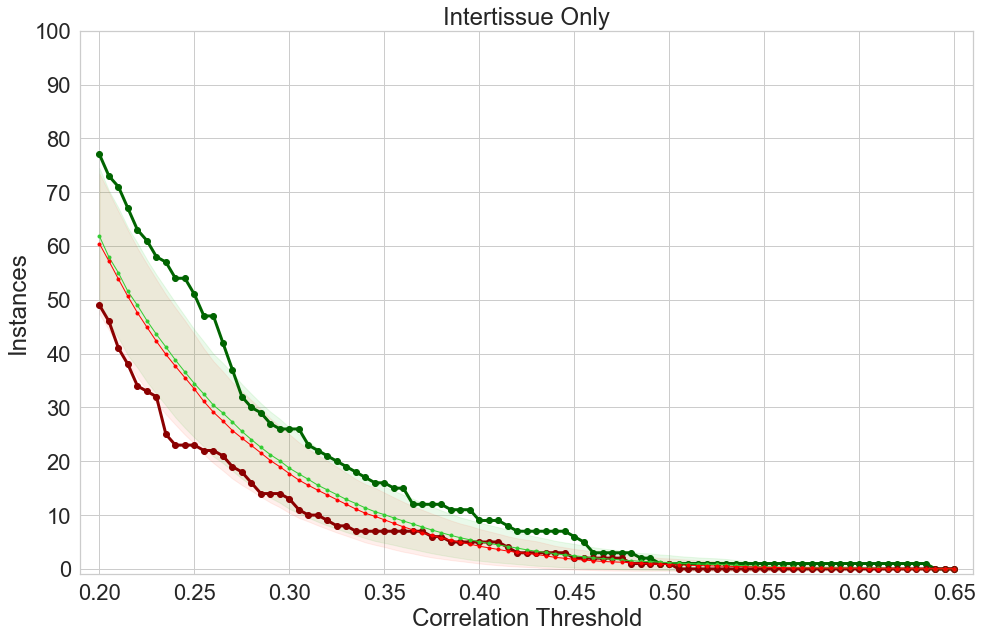

In [41]:
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(-1, 100)
plt.yticks([0,10,20,30,40,50,
            60,70,80,90,100])
plt.xticks([0.2,0.25,0.3,0.35,0.40,0.45,0.50,0.55,0.60,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_pos = df_metabolic['pos cases'].tolist()
met_neg = df_metabolic['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')
#plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='mediumturquoise')
#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=3, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=3, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')


'''
plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            "Random 95th  percentile: positive",
            "Random 5th percentile: negative",
            
            "Random: positive",
            "Random: negative"], loc ="upper right",title="Correlation")
'''
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Instances')
plt.title('Intertissue Only')
plt.savefig('3BPlus', dpi=600)

In [ ]:
ratio_quantile95 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
ratio_quantile90 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [ ]:
display(ratio_quantile95 )

pos cases  neg cases    ratios
corr thresholds                                
0.200                 84.0       84.0  1.392951
0.205                 80.0       79.0  1.391507
0.210                 77.0       75.0  1.403526
0.215                 73.0       72.0  1.423135
0.220                 69.0       68.0  1.458494
...                    ...        ...       ...
0.630                  1.0        0.0  1.000000
0.635                  0.0        0.0  0.000000
0.640                  0.0        0.0  0.000000
0.645                  0.0        0.0  0.000000
0.650                  0.0        0.0  0.000000

[91 rows x 3 columns]

In [ ]:
display(ratio_quantile90)

pos cases  neg cases    ratios
corr thresholds                                
0.200                 78.0       77.0  1.288038
0.205                 74.0       74.0  1.285714
0.210                 70.0       70.1  1.315000
0.215                 66.0       67.0  1.317719
0.220                 63.1       64.0  1.334211
...                    ...        ...       ...
0.630                  0.0        0.0  0.000000
0.635                  0.0        0.0  0.000000
0.640                  0.0        0.0  0.000000
0.645                  0.0        0.0  0.000000
0.650                  0.0        0.0  0.000000

[91 rows x 3 columns]

In [43]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(0, 4)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks([0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_ratio = df_metabolic['ratio pos neg'].tolist()
avg_ratio = df_all['ratios'].tolist()

#mean_ran_pos = df_all['pos cases'].tolist()
#mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratios std minus'].tolist()
upper_bound_ratio = df_all['ratios std plus'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')


plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg ",
            "Random 95th  percentile ratio: pos /neg",
            #"Random 5th percentile: negative",
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper left",title="Correlation")

            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Ratio')
plt.title('Intertissue only')
plt.savefig('InterTissue corr Ratio nolegend')
'''

'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(0, 4)\nplt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])\nplt.xticks([0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])\nplt.xlim(0.19,0.66)\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_metabolic[\'ratio pos neg\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\n#mean_ran_pos = df_all[\'pos cases\'].tolist()\n#mean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratios std minus\'].tolist()\nupper_bound_ratio = df_all[\'ratios std plus\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\npercentile90 = ratio_quantile90[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \n\n\n\n\nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 

In [44]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(0, 4)
plt.yticks([0,1,2,3])
plt.xticks([0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_ratio = df_metabolic['ratio pos neg'].tolist()
avg_ratio = df_all['ratios'].tolist()

#mean_ran_pos = df_all['pos cases'].tolist()
#mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratios std minus'].tolist()
upper_bound_ratio = df_all['ratios std plus'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 



plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile99, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')


plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg ",
            "Random 95th  percentile ratio: pos /neg",
            "Random 99th  percentile ratio: pos /neg"
           
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper left",title="Correlation")

            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Ratio')
plt.title('Intertissue only')
plt.savefig('InterTissue corr Ratio legend')
'''


'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(0, 4)\nplt.yticks([0,1,2,3])\nplt.xticks([0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])\nplt.xlim(0.19,0.66)\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_metabolic[\'ratio pos neg\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\n#mean_ran_pos = df_all[\'pos cases\'].tolist()\n#mean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratios std minus\'].tolist()\nupper_bound_ratio = df_all[\'ratios std plus\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \n\n\n\nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, avg_ratio, linewidth=3, markersize=6,